# 1: ENTENDIMENTO DO PROBLEMA



# PREDIÇÃO DE RISCO DE CÂNCER CERVICAL

Treinaremos um modelo XGBoost para predizer câncer cervical em 858 pacientes.
O dataset foi coletado no Hospital Universitário de Caracas, Venezuela e contém informações demográficas, hábitos, e históricos médicos de 858 pacientes.
Câncer cervical mata aproximadamente 300 mil mulheres ao redor do mundo. Devido ao aumento da análise de imagens, a taxa de morte por câncer cervical foi reduzida em 74% de 1955 a 1992.
Estudos mostram que alta atividade sexual, contrair HPV pode ser um dos fatores para aumentar os riscos de câncer cervical.
A presença de hormônios e contraceptivos orais, ter muitos filhos, e fumar aumentam os riscos de desenvolver câncer cervical, particularmente em mulheres infectadas com HPV. Pessoas com baixo sistema imunológico tem alto risco de HPV.

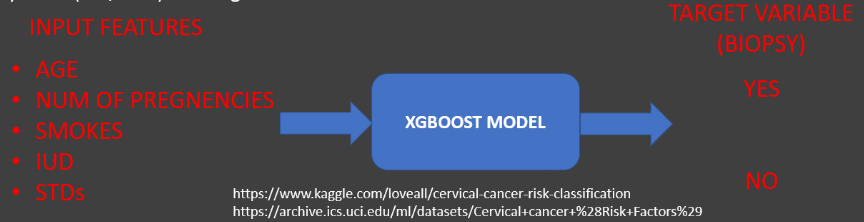

https://www.youtube.com/watch?v=rTViRKW4PIU


# 2: IMPORTAR O DATASET E BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

%pip install plotly
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 

In [ ]:
# import the csv files using pandas 
cancer_df = pd.read_csv("")

In [2]:

# (int) Age
# (int) Number of sexual partners
# (int) First sexual intercourse (age)
# (int) Num of pregnancies
# (bool) Smokes
# (bool) Smokes (years)
# (bool) Smokes (packs/year)
# (bool) Hormonal Contraceptives
# (int) Hormonal Contraceptives (years)
# (bool) IUD ("IUD" stands for "intrauterine device" and used for birth control
# (int) IUD (years)
# (bool) STDs (Sexually transmitted disease)
# (int) STDs (number)
# (bool) STDs:condylomatosis
# (bool) STDs:cervical condylomatosis
# (bool) STDs:vaginal condylomatosis
# (bool) STDs:vulvo-perineal condylomatosis
# (bool) STDs:syphilis
# (bool) STDs:pelvic inflammatory disease
# (bool) STDs:genital herpes
# (bool) STDs:molluscum contagiosum
# (bool) STDs:AIDS
# (bool) STDs:HIV
# (bool) STDs:Hepatitis B
# (bool) STDs:HPV
# (int) STDs: Number of diagnosis
# (int) STDs: Time since first diagnosis
# (int) STDs: Time since last diagnosis
# (bool) Dx:Cancer
# (bool) Dx:CIN
# (bool) Dx:HPV
# (bool) Dx
# (bool) Hinselmann: target variable - A colposcopy is a procedure in which doctors examine the cervix. 
# (bool) Schiller: target variable - Schiller's Iodine test is used for cervical cancer diagnosis
# (bool) Cytology: target variable - Cytology is the exam of a single cell type used for cancer screening.
# (bool) Biopsy: target variable - Biopsy is performed by removing a piece of tissue and examine it under microscope, 
# Biopsy is the main way doctors diagnose most types of cancer. 

In [ ]:
# Let's explore the dataframe


MINI CHALLENGE #1: 
- Print the last 20 rows in the dataframe

# 3: ANÁLISE EXPLORATÓRIA DE DADOS

In [ ]:
# Get data frame info


In [ ]:
# Get the statistics of the data frame


In [ ]:
# Notice many question marks indicating missing values


In [7]:
# Let's replace '?' with NaN 
cancer_df = cancer_df.replace('?', np.nan)
cancer_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
#Find null data
cancer_df.isnull()

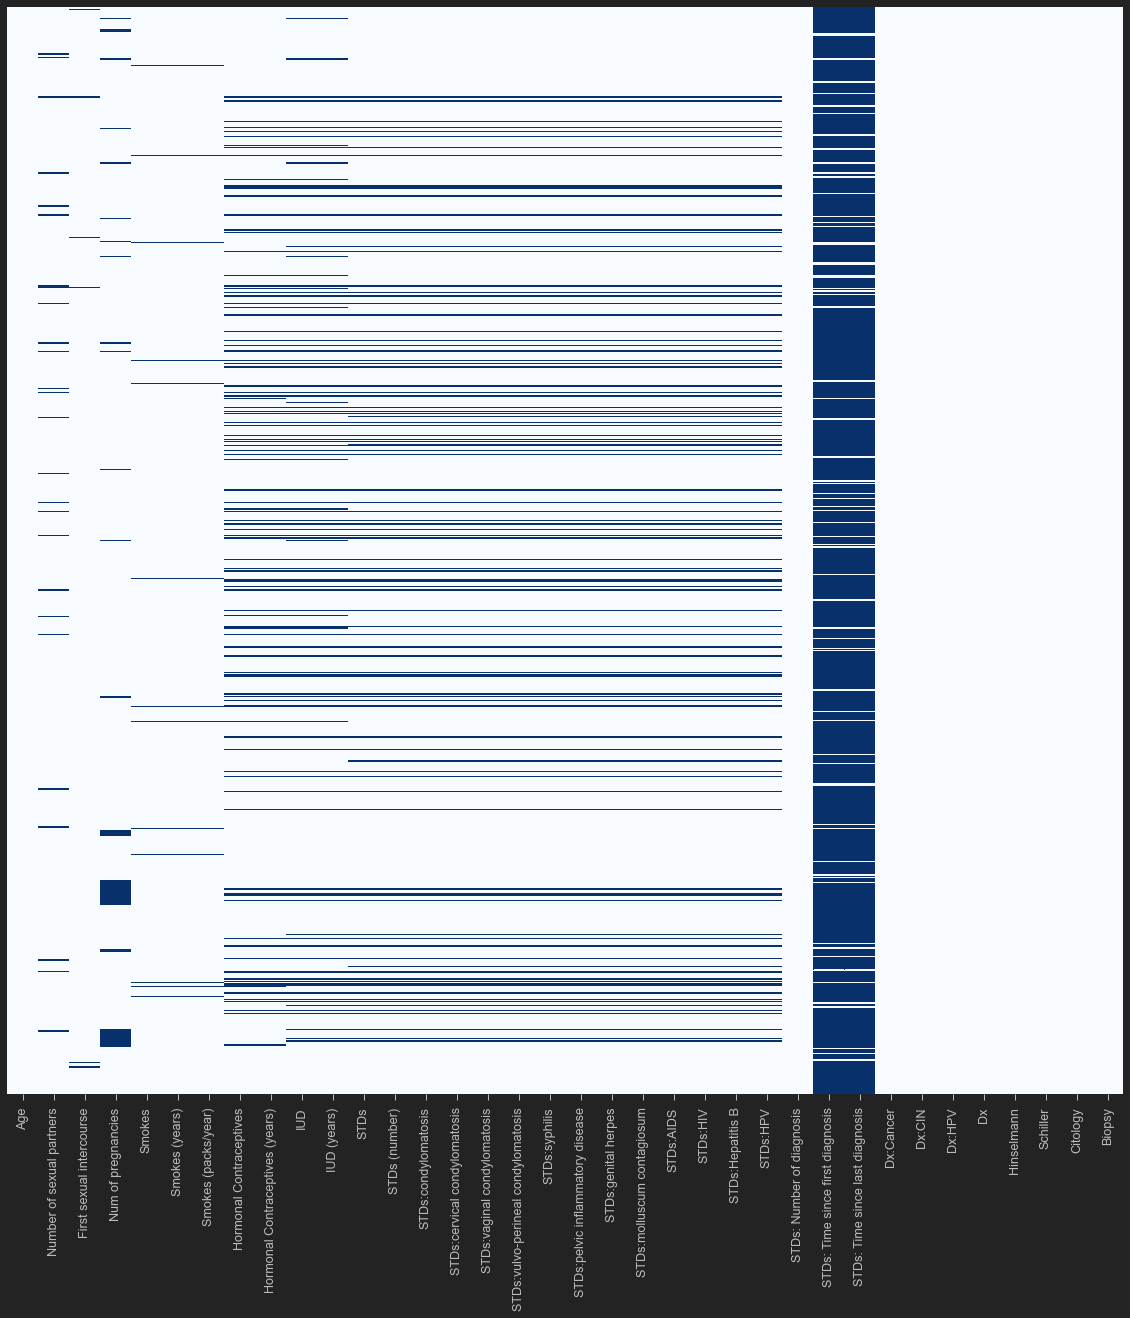

In [8]:
# Plot heatmap from null data

plt.figure(figsize=(20, 20))
sns.heatmap(cancer_df.isnull(), yticklabels=False)

In [9]:
# Get data frame info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [ ]:
# Since STDs: Time since first diagnosis  and STDs: Time since last diagnosis have more than 80% missing values 
# we can drop them


In [ ]:
# Since most of the column types are object, we are not able to get the statistics of the dataframe.
# Convert them to numeric type

cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

In [ ]:
# Get the statistics of the dataframe


In [ ]:
#Calculate mean


In [ ]:
# Replace null values with mean


In [ ]:
# Nan heatmap
sns.heatmap(cancer_df.isnull(), yticklabels=False)

MINI CHALLENGE #2:
- Qual o intervalo de idades das pessoas envolvidas?
- Quail o resultado da biopsia para a pessoa mais velha nesse estudo?

# 4: VIZUALIZAÇÃO DOS DADOS

In [ ]:
# Get the correlation matrix


In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True)
plt.show()

MINI CHALLENGE #3:
- Plot o histograma para todo o  DataFrame

# TASK #5: PREPARE OS DADOS ANTES DO TREINAMENTO

In [20]:
cancer_df

In [ ]:
target_df = cancer_df['Biopsy']
input_df = cancer_df.drop(columns=['Biopsy'])

In [21]:
target_df.shape

(858,)

In [22]:
input_df.shape

(858, 33)

In [ ]:
target_df

In [24]:
X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

In [25]:
# reshaping the array from (421570,) to (421570, 1)
# y = y.reshape(-1,1)
y.shape

(858,)

In [26]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler



In [27]:
X

array([[-1.0385634e+00,  8.9706147e-01, -7.1509570e-01, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [-1.3917956e+00, -9.3074709e-01, -1.0734857e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 8.4534228e-01, -9.3074709e-01,  2.2945171e-07, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       ...,
       [-2.1435465e-01, -3.2147753e-01,  1.6845580e-03, ...,
        -2.0622157e-01, -3.0722591e-01,  4.3011627e+00],
       [ 7.2759819e-01, -3.2147753e-01,  2.5104153e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01],
       [ 2.5662178e-01, -3.2147753e-01,  1.0768549e+00, ...,
        -2.0622157e-01, -3.0722591e-01, -2.3249528e-01]], dtype=float32)

In [29]:
# spliting the data in to test and train sets


MINI CHALLENGE #4:
- Divida os dados de teste de forma que sejam um quarto dos dados de treinamento

# 6: ENTENDENDO O XGBOOST

## XGBOOST: INTRODUÇÃO

- XGBOOST OU EXTREME GRADIENT BOOSTING é o algoritmo que muitos cientistas de dados usam tanto para regressão quanto para classificação.
- XGBoost é um algoritmo de aprendizado supervisionado e implementa algoritmos de árvores de aumento de gradiente.
- O algoritmo funciona combinando predições de vários modelos menores.
- Ele é robusto a várias distribuições de dados e possibilita a configuração dos hiper-parâmetros.
- XGBoost gera modelos com velocidade e otimiza a utilização da memória.
- XGBoost é análoga a ideia de "descobrindo a verdade ao construir em cima de descobertas prévias".

## XGBoost:o que é boost

- O algoritmo aprende a partir de erros anteriores (erros nas predições dos modelos) para ter predições melhores no futuro.
- Técnica de machine learning que une um conjunto de modelos mais fracos que trabalham de forma sequencial.
- Cada modelo está tentando aprender de um modelo anterior mais fraco e se torna melhor nas predições.
- Os algoritmos geram um modelo a partir de um conjunto de dados de treinamento, então o segundo modelo é construído baseado nos erros do primeiro modelo. O algoritmo repete até que o número máximo de modelos sejam criados ou até que o modelo tenha boas predições.

## XGBoost: Exemplo

- Modelo #1 trabalha ao tentar classificar em duas classes (+/-).
- Modelo #1 tem ajustado pesos iguais para todos os dados, já que não há um conhecimento prévio sobre os dados.
- O modelo errou 3 amostras (+).

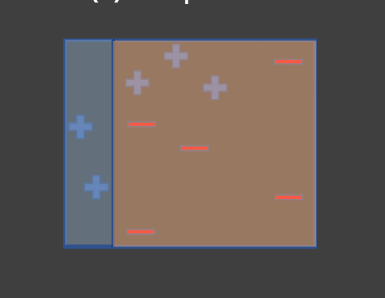


## XGBoost: Exemplo

- Modelo #2 aprende a partir dos erros do modelo anterior e coloca mais pesos para os pontos classificados errado (3 +).
- O modelo separa verticalmente as classes e tenta classificar de maneira apropriada a amostra.
- O modelo fez um bom trabalho ao corrigir os pontos classificados com maior peso, mas no processo classificou errado 2 (-). 

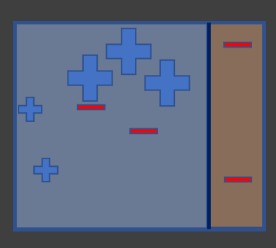

## XGBoost: Exemplo

- O modelo #3 aprende a partir dos erros do Modelo #2 e adiciona mais pesos aos pontos classificados erroneamente (2-).
- Então o modelo #3 desenha uma linha horizontal separando apropriadamente esses pontos.
- Dessa vez, o modelo conseguiu classificar os pontos com maior peso, no entanto deixou de classificar outros.

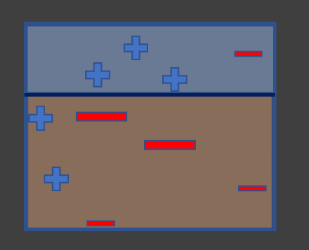

## XGBoost: Exemplo

- O modelo #4 combina todos os erros anteriores dos modelos mais fracos para construir um modelo melhor que classifique corretamente todos os dados.

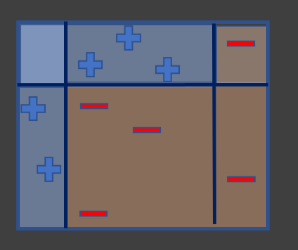

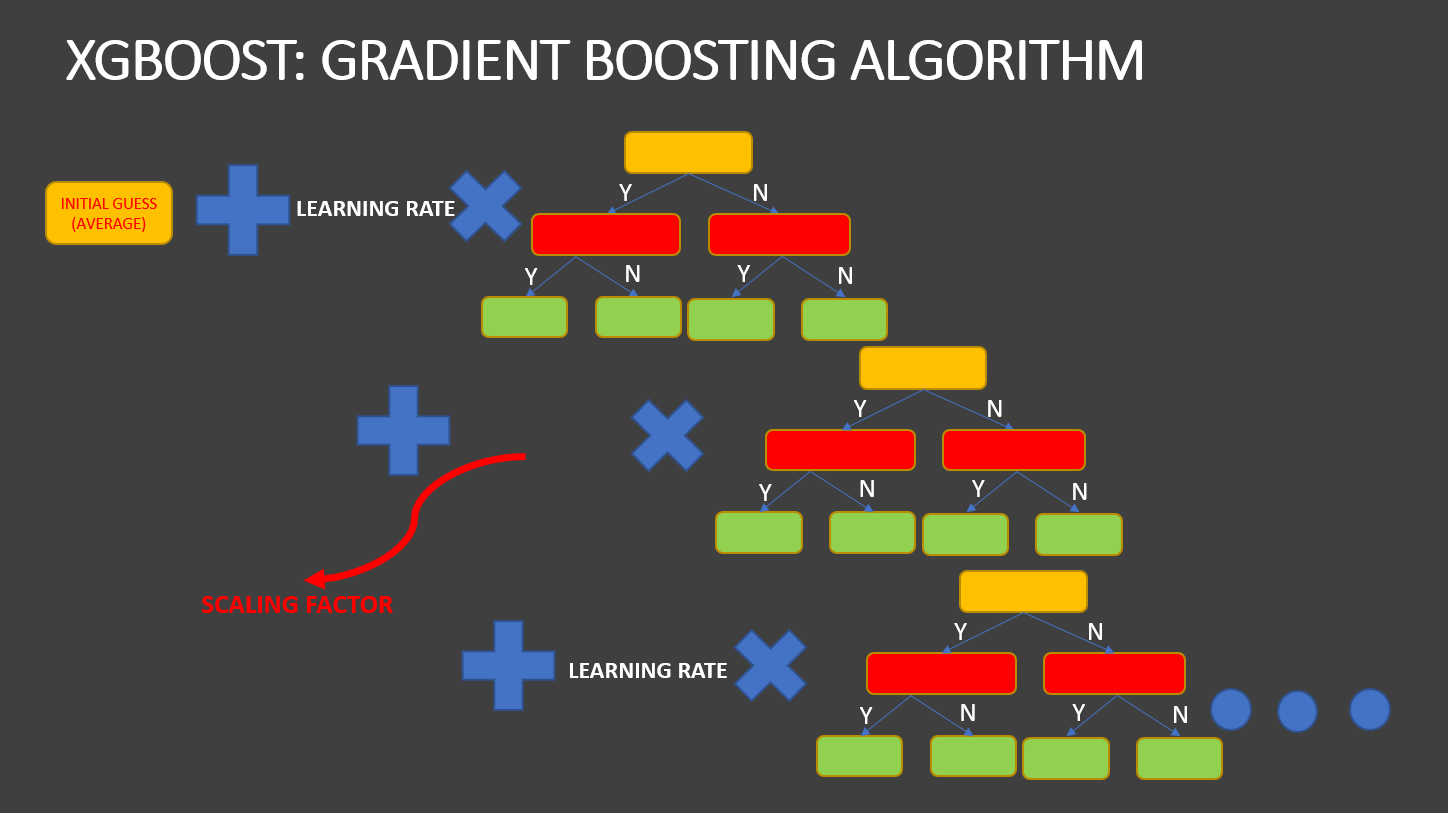

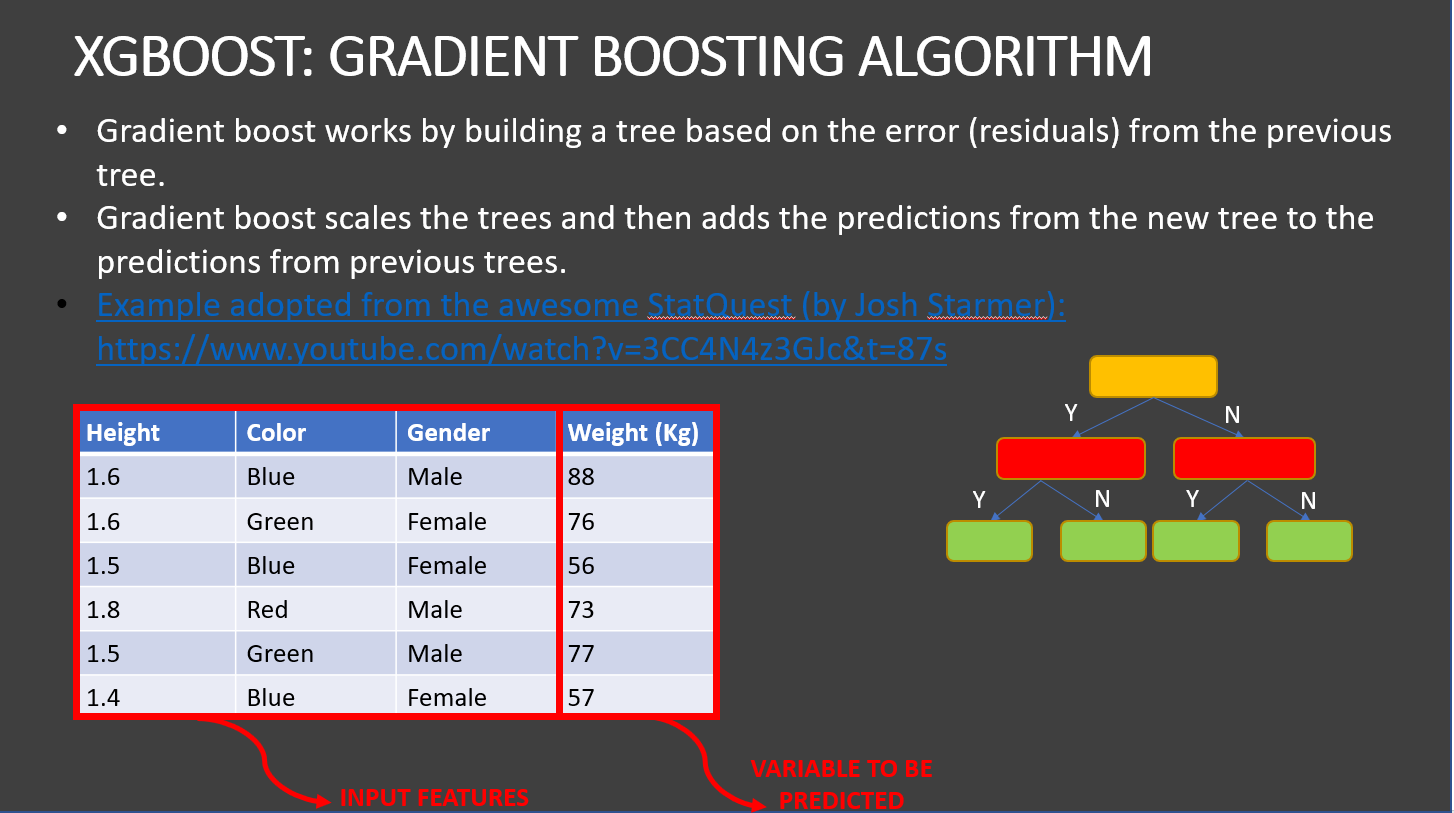

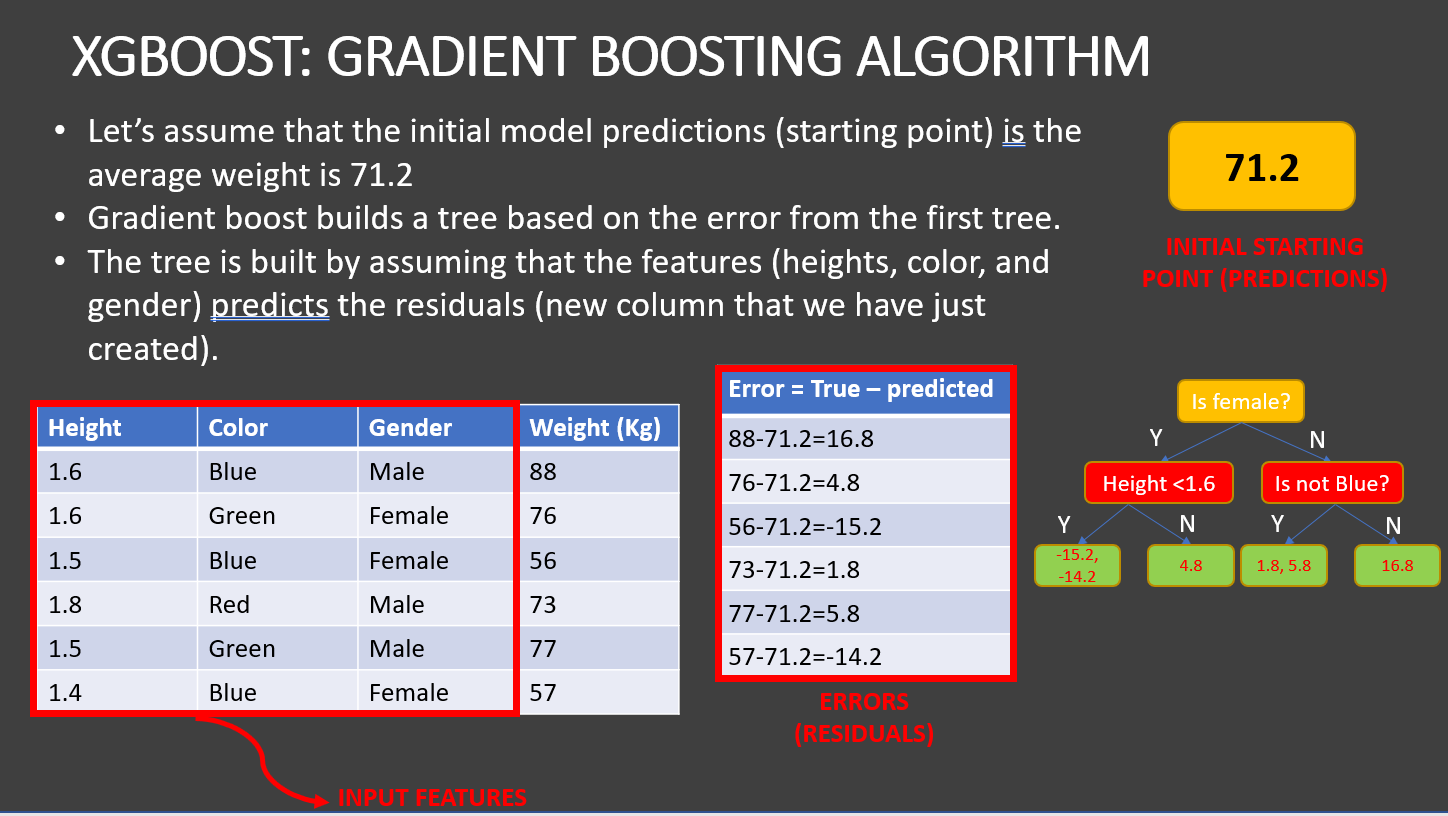

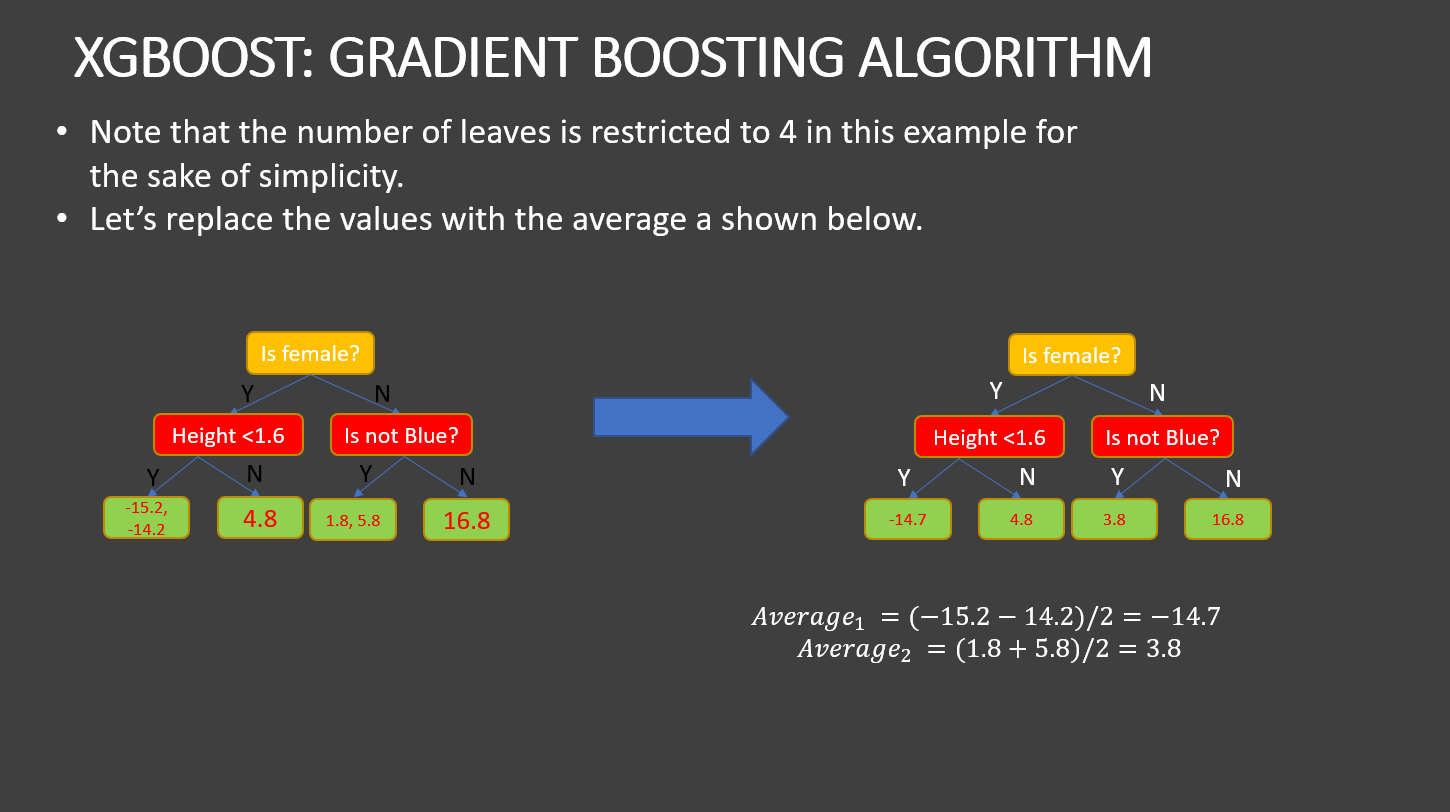

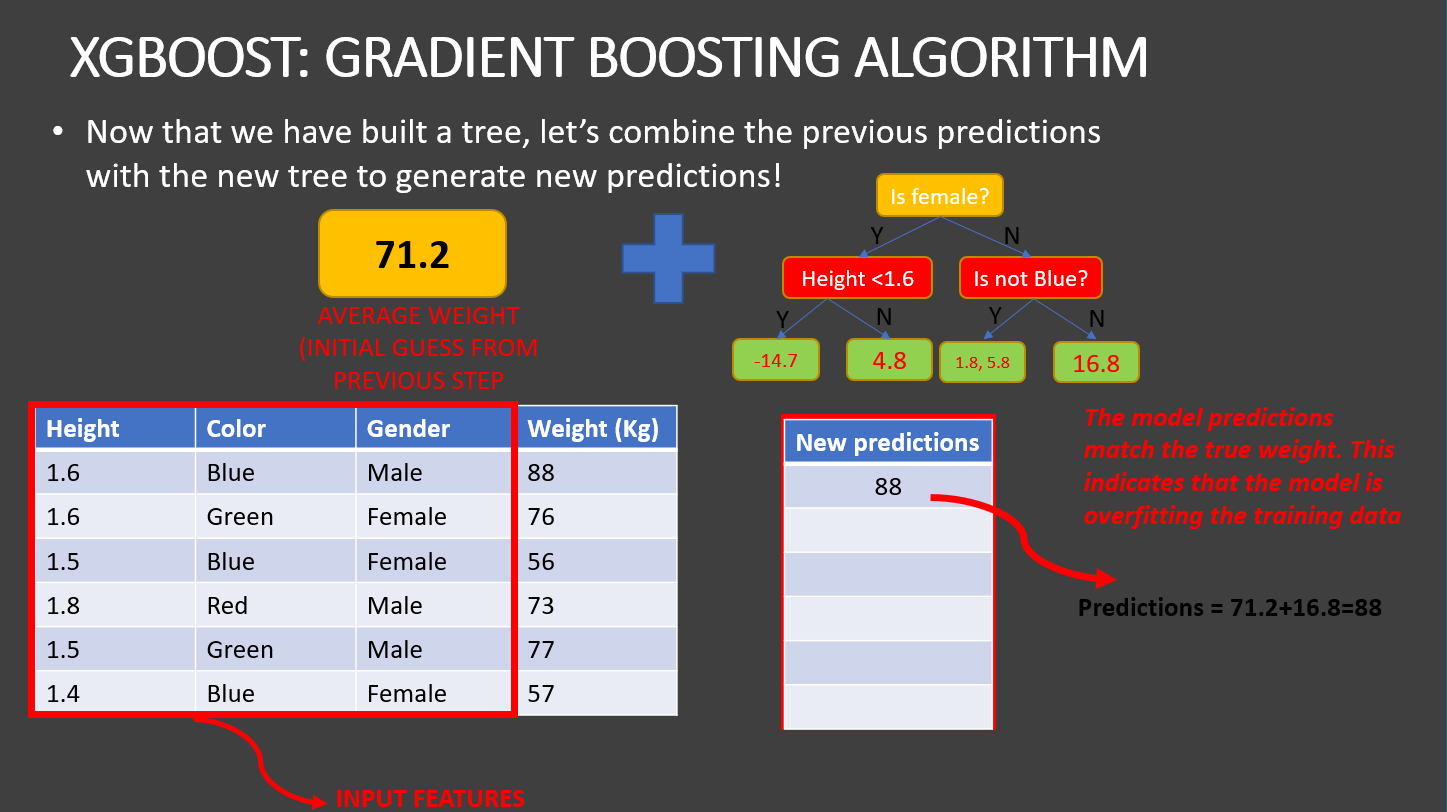

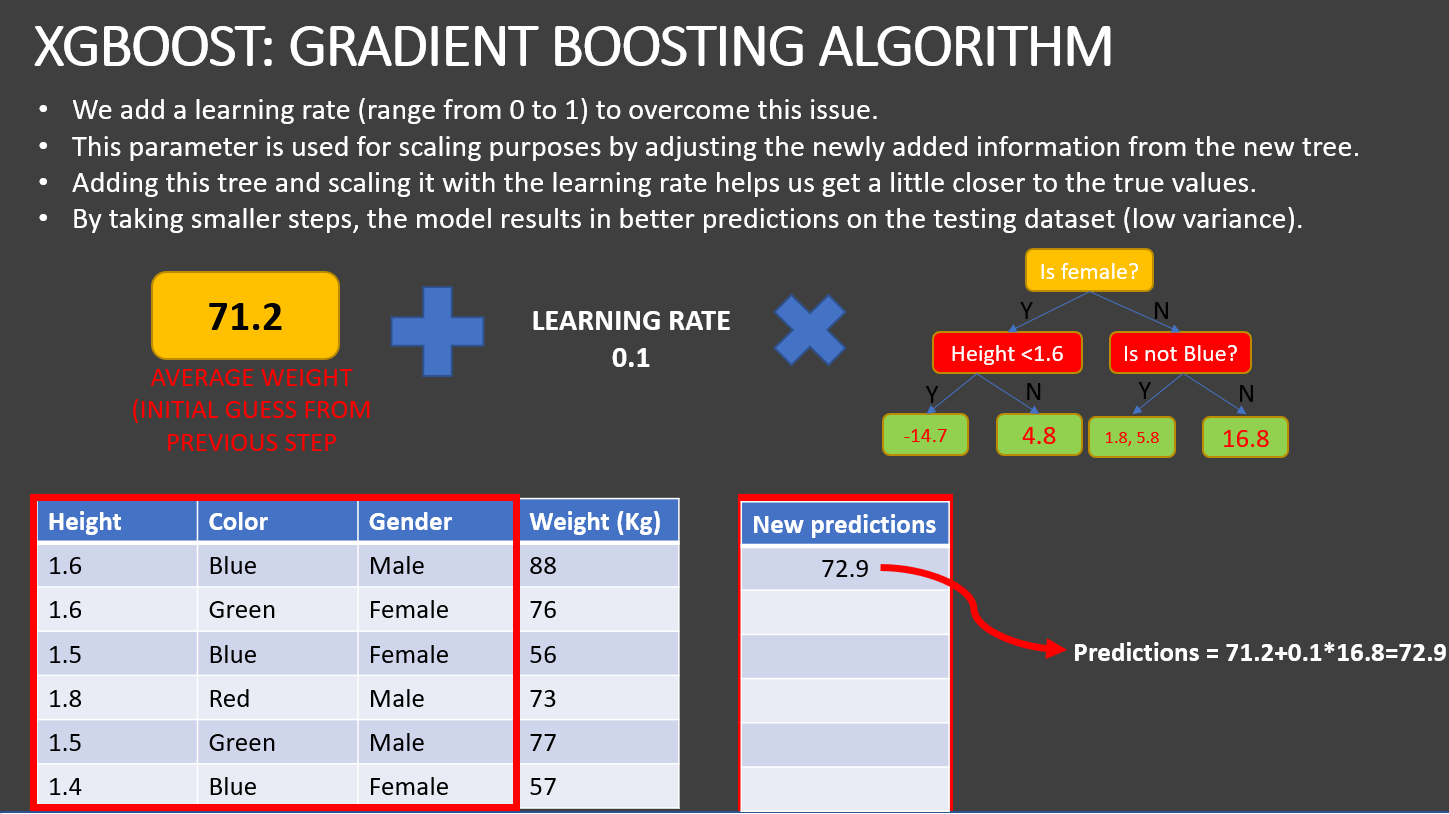

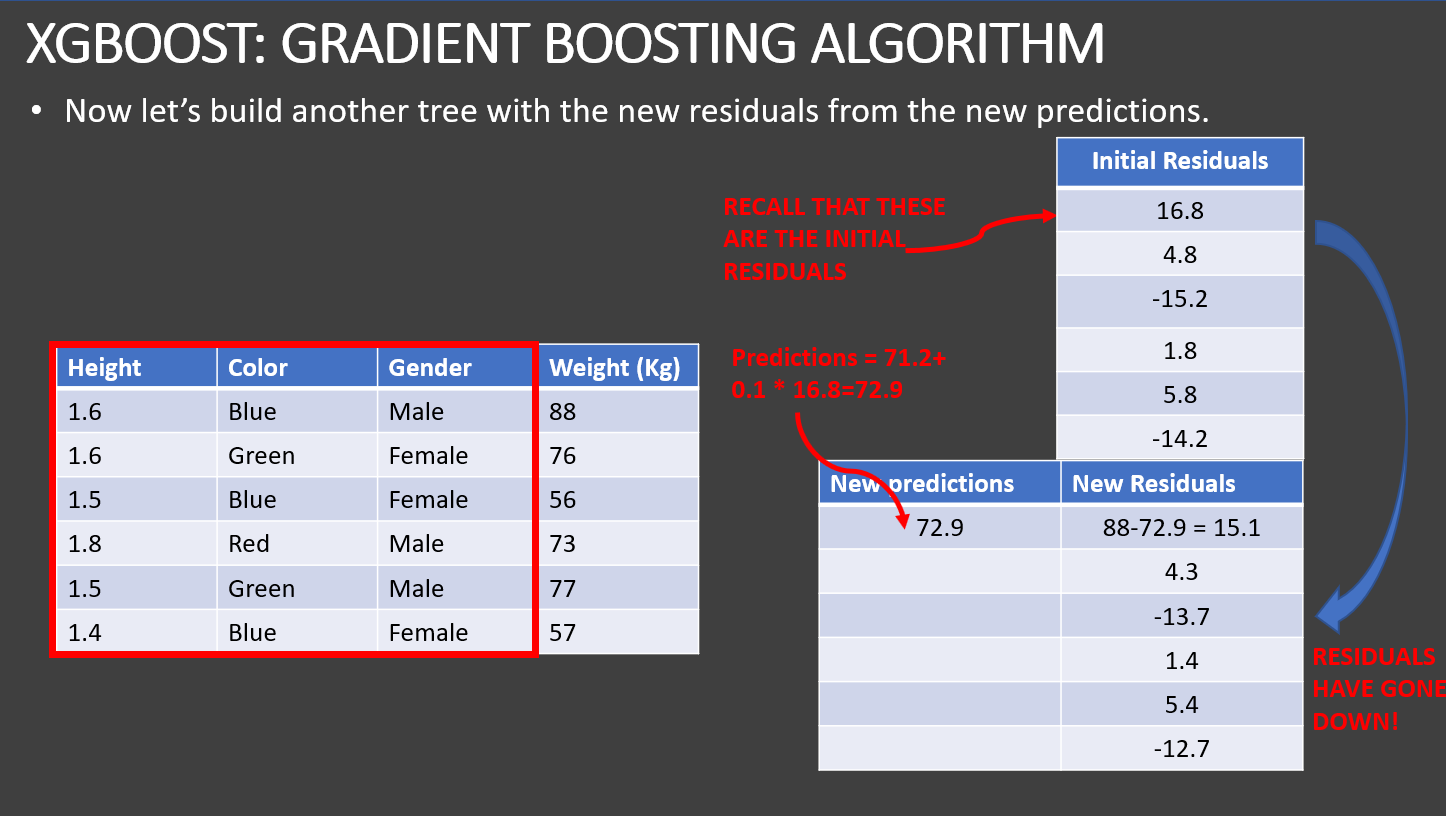

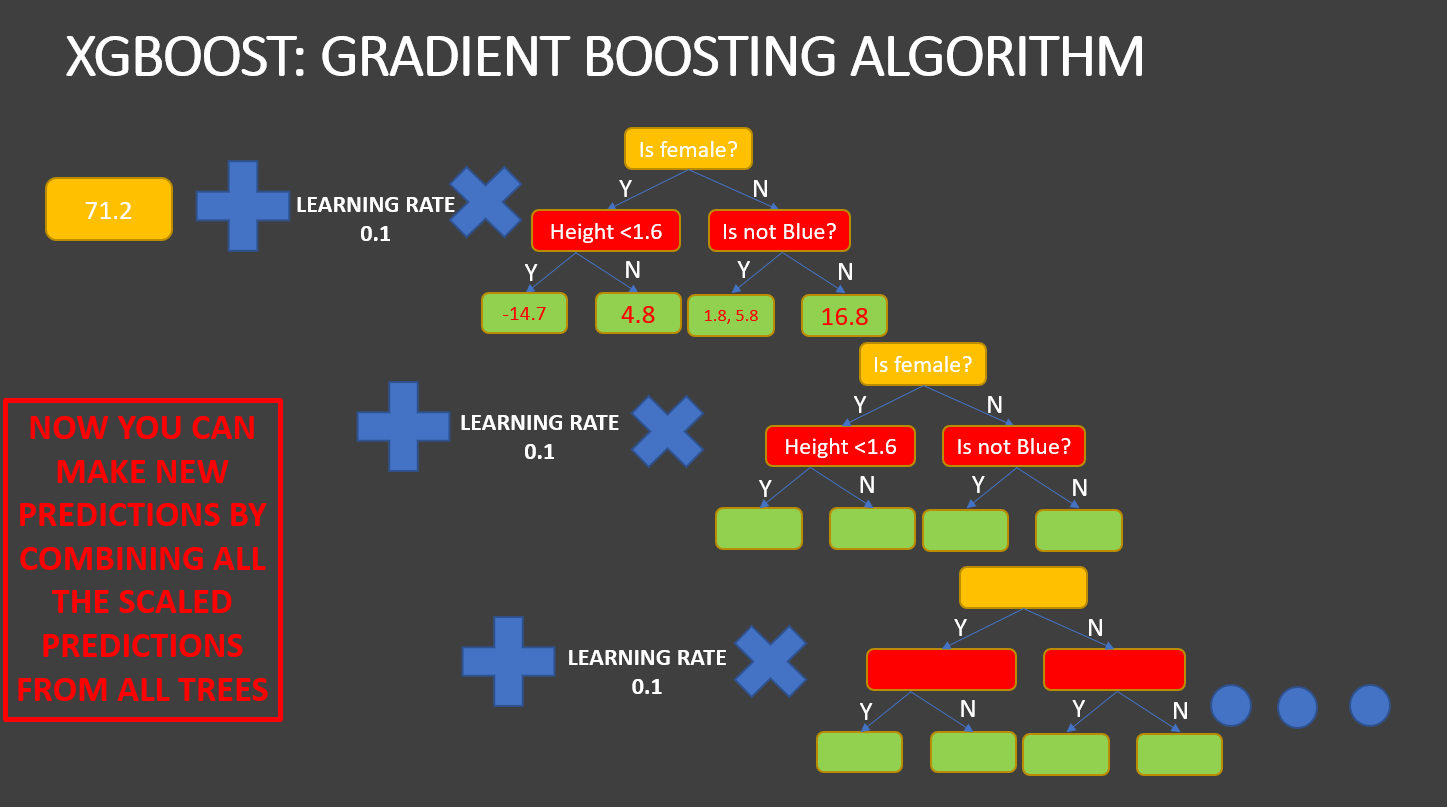

# 7: TREINE E AVALIE SEU CLASSIFICADOR XGBOOST

In [ ]:
%pip install xgboost

In [ ]:
# Train an XGBoost classifier model 


In [32]:
# predict the score of the trained model using the training dataset



Accuracy : 0.9752186588921283


In [34]:
# predict the score of the trained model using the testing dataset


Accuracy : 0.9418604651162791


In [35]:
# make predictions on the test data



In [36]:
#Make a classification report

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        82
         1.0       0.44      1.00      0.62         4

    accuracy                           0.94        86
   macro avg       0.72      0.97      0.79        86
weighted avg       0.97      0.94      0.95        86



Text(0.5, 61.0, 'Actual class')

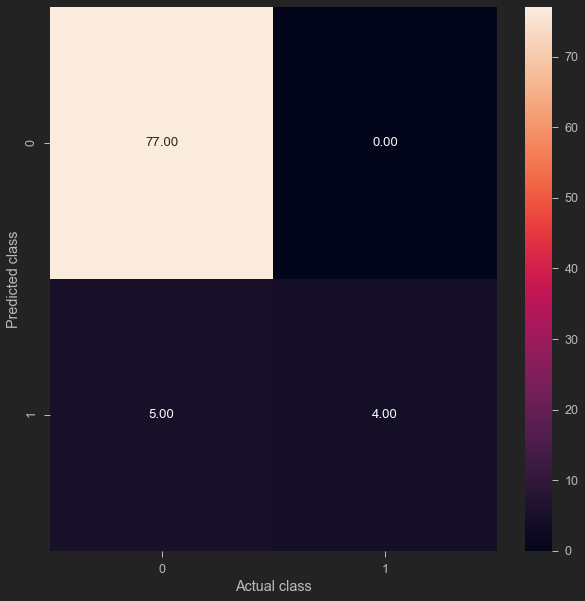

In [37]:
#Make a confusion matrix
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot=True)

MINI CHALLENGE #5:

- Retreine o modelo com 10x e 100x o número de estimators e tree depth
- Plot a matriz de confusão
- Comente a performance dos modelos